In [1]:
import os
import json
import pandas as pd
import seaborn as sns

In [2]:
acc = []
losses = {}
for folder in os.listdir("preprocessing_trials"):
    if folder == '.DS_Store':
        continue
    config = folder.split("_")
    row = {}
    for i in range(0, len(config), 2):
        row[config[i]] = {"true": True, "false": False}[config[i+1]]
    acc.append(row)
    with open(f"./preprocessing_trials/{folder}/experiment_stats.json", "r") as f:
        evaluation = json.load(f)
    row.update(evaluation)
    losses[folder] = evaluation["loss"]

In [3]:
pd.DataFrame(acc).sort_values(by="accurary", ascending=False)

,log,pca,adasyn,smote,ros,feat,accurary,loss,train_samples,test_samples,features
5,True,False,False,False,False,True,71.228935,"[4.469998434874744, 1.5917794148155084, 1.2152...",2853754,713439,88
10,True,True,False,False,False,True,71.125212,"[1.7237134034820336, 1.1845313130978847, 1.068...",2853754,713439,28
13,True,True,False,False,False,False,70.125687,"[1.7166198945872098, 1.1879229442473491, 1.085...",2853754,713439,25
12,True,True,True,False,False,False,70.125687,"[1.7166198945872098, 1.1879229442473491, 1.085...",2853754,713439,25
8,False,False,False,False,False,True,69.588010,"[2.280836481869346, 1.2969518154939843, 1.2033...",2853754,713439,88
14,False,True,False,False,False,True,69.546801,"[1.6917191957811244, 1.2251549124918752, 1.145...",2853754,713439,43
0,False,False,False,False,False,False,68.063422,"[2.178956190566759, 1.3222965625626657, 1.2132...",2853754,713439,73
3,False,True,False,False,False,False,67.985210,"[1.702144319111413, 1.2774417744231623, 1.1954...",2853754,713439,35
16,False,True,True,False,False,False,67.985210,"[1.702144319111413, 1.2774417744231623, 1.1954...",2853754,713439,35
1,False,False,False,False,True,True,65.795114,"[2.504011327440978, 1.531805533013015, 1.42753...",4733041,713439,88


[(0.85, 2.75)]

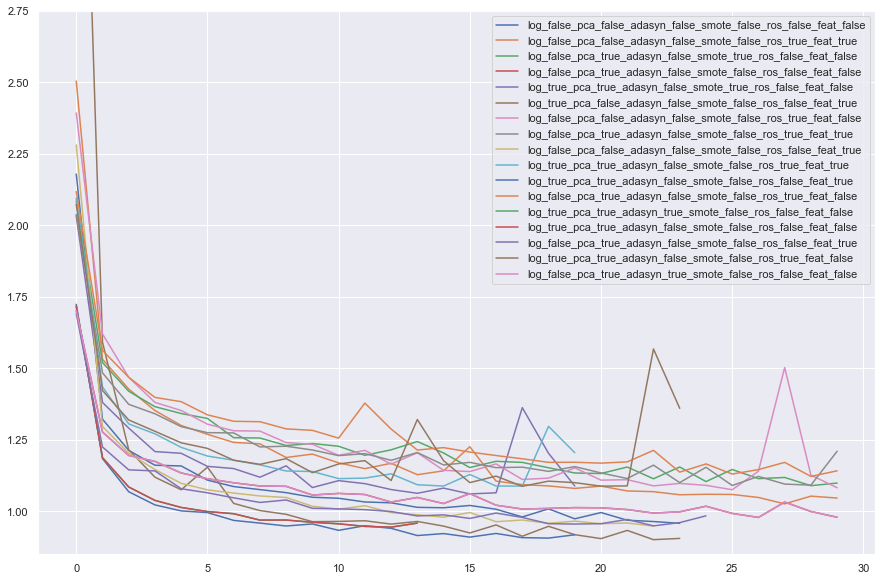

In [4]:
sns.set_theme()
sns.set(rc={'figure.figsize':(15, 10)})
for folder, loss in losses.items():
    ax = sns.lineplot(x=range(len(loss)), y=loss, label=folder)
ax.set(ylim=(0.85, 2.75))